Telecom Churn Case Study

### Problem Statement
Customer retention has now become even more important than customer acquisition
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). 
churn prediction is usually more critical (and non-trivial) for prepaid customers - Usage based churn
Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.
High-value customers to be defined based on a certain metric and predict churn only on high-value customers.

In [1]:
# Importing the libraries which ever required during the Analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

Reading the Data file and understanding it

In [2]:
tccs_df = pd.read_csv('Telecom_Churn_Data.csv')
tccs_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
tccs_df.shape

(99999, 226)

In [4]:
tccs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
tccs_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


Checking Missing Values

In [ ]:
tccs_miss_df = (round(((tccs_df.isnull().sum()/len(tccs_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tccs_miss_df

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [7]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(tccs_miss_df.index[tccs_miss_df['null'] > 30])
col_list_missing_30

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [8]:
# Delete the columns having more than 30% missing values
tccs_df = tccs_df.drop(col_list_missing_30, axis=1)

In [9]:
tccs_df.shape

(99999, 186)

In [10]:
# List the date columns
date_cols = [k for k in tccs_df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
# Dropping date columns
tccs_df = tccs_df.drop(date_cols, axis=1)

In [12]:
# Drop circle_id column
tccs_df = tccs_df.drop('circle_id', axis=1)

In [13]:
tccs_df.shape

(99999, 177)

Dropped/deleted Date columns and circle_id column as the date columns are not required in analysis and circle_id column has only one unique value. Hence, deleted/dropped these columns.

### High value customers

In [14]:
#Taking the Average of the sum
tccs_df['avg_rech_amt_6_7'] = (tccs_df['total_rech_amt_6'] + tccs_df['total_rech_amt_7'])/2

In [15]:
#Finding the 70th Percentile
X = tccs_df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [ ]:
#Customers who have recharged more than or equal to X
tccs_df = tccs_df[tccs_df['avg_rech_amt_6_7'] >= X]
tccs_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [17]:
tccs_df.shape

(30011, 178)

We have ~30K records after filtering

Till now, we filtered by Column. But now we will filter the dataset by Rows.

In [ ]:
# Count the rows having more than 50% missing values
tccs_df_miss_rows_50 = tccs_df[(tccs_df.isnull().sum(axis=1)) > (len(tccs_df.columns)//2)]
tccs_df_miss_rows_50.shape

(114, 178)

In [ ]:
# Deleting the rows having more than 50% missing values
tccs_df = tccs_df.drop(tccs_df_miss_rows_50.index)
tccs_df.shape

(29897, 178)

In [ ]:
# Checking the missing values in columns again
tccs_df_miss_col = (round(((tccs_df.isnull().sum()/len(tccs_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tccs_df_miss_col

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


In [21]:
# Listing the columns of MOU Sep(9)
print(((tccs_df_miss_col[tccs_df_miss_col['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [ ]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
tccs_null_mou_9_df = tccs_df[(tccs_df['loc_og_t2m_mou_9'].isnull()) & (tccs_df['loc_ic_t2f_mou_9'].isnull()) & (tccs_df['roam_og_mou_9'].isnull()) & (tccs_df['std_ic_t2m_mou_9'].isnull()) &
  (tccs_df['loc_og_t2t_mou_9'].isnull()) & (tccs_df['std_ic_t2t_mou_9'].isnull()) & (tccs_df['loc_og_t2f_mou_9'].isnull()) & (tccs_df['loc_ic_mou_9'].isnull()) &
  (tccs_df['loc_og_t2c_mou_9'].isnull()) & (tccs_df['loc_og_mou_9'].isnull()) & (tccs_df['std_og_t2t_mou_9'].isnull()) & (tccs_df['roam_ic_mou_9'].isnull()) &
  (tccs_df['loc_ic_t2m_mou_9'].isnull()) & (tccs_df['std_og_t2m_mou_9'].isnull()) & (tccs_df['loc_ic_t2t_mou_9'].isnull()) & (tccs_df['std_og_t2f_mou_9'].isnull()) & 
  (tccs_df['std_og_t2c_mou_9'].isnull()) & (tccs_df['og_others_9'].isnull()) & (tccs_df['std_og_mou_9'].isnull()) & (tccs_df['spl_og_mou_9'].isnull()) & 
  (tccs_df['std_ic_t2f_mou_9'].isnull()) & (tccs_df['isd_og_mou_9'].isnull()) & (tccs_df['std_ic_mou_9'].isnull()) & (tccs_df['offnet_mou_9'].isnull()) & 
  (tccs_df['isd_ic_mou_9'].isnull()) & (tccs_df['ic_others_9'].isnull()) & (tccs_df['std_ic_t2o_mou_9'].isnull()) & (tccs_df['onnet_mou_9'].isnull()) & 
  (tccs_df['spl_ic_mou_9'].isnull())]

tccs_null_mou_9_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [23]:
tccs_null_mou_9_df.shape

(1590, 178)

In [24]:
# Deleting the records for which MOU for Sep(9) are null
tccs_df = tccs_df.drop(tccs_null_mou_9_df.index)

In [25]:
# Again Cheking percent of missing values in columns
tccs_df_miss_col = (round(((tccs_df.isnull().sum()/len(tccs_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tccs_df_miss_col

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


In [26]:
# Listing the columns of MOU Aug(8)
print(((tccs_df_miss_col[tccs_df_miss_col['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [ ]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
tccs_null_mou_8_df = tccs_df[(tccs_df['loc_og_t2m_mou_8'].isnull()) & (tccs_df['loc_ic_t2f_mou_8'].isnull()) & (tccs_df['roam_og_mou_8'].isnull()) & (tccs_df['std_ic_t2m_mou_8'].isnull()) &
  (tccs_df['loc_og_t2t_mou_8'].isnull()) & (tccs_df['std_ic_t2t_mou_8'].isnull()) & (tccs_df['loc_og_t2f_mou_8'].isnull()) & (tccs_df['loc_ic_mou_8'].isnull()) &
  (tccs_df['loc_og_t2c_mou_8'].isnull()) & (tccs_df['loc_og_mou_8'].isnull()) & (tccs_df['std_og_t2t_mou_8'].isnull()) & (tccs_df['roam_ic_mou_8'].isnull()) &
  (tccs_df['loc_ic_t2m_mou_8'].isnull()) & (tccs_df['std_og_t2m_mou_8'].isnull()) & (tccs_df['loc_ic_t2t_mou_8'].isnull()) & (tccs_df['std_og_t2f_mou_8'].isnull()) & 
  (tccs_df['std_og_t2c_mou_8'].isnull()) & (tccs_df['og_others_8'].isnull()) & (tccs_df['std_og_mou_8'].isnull()) & (tccs_df['spl_og_mou_8'].isnull()) & 
  (tccs_df['std_ic_t2f_mou_8'].isnull()) & (tccs_df['isd_og_mou_8'].isnull()) & (tccs_df['std_ic_mou_8'].isnull()) & (tccs_df['offnet_mou_8'].isnull()) & 
  (tccs_df['isd_ic_mou_8'].isnull()) & (tccs_df['ic_others_8'].isnull()) & (tccs_df['std_ic_t2o_mou_8'].isnull()) & (tccs_df['onnet_mou_8'].isnull()) & 
  (tccs_df['spl_ic_mou_8'].isnull())]

tccs_null_mou_8_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [28]:
# Deleting the records for which MOU for Aug(8) are null
tccs_df = tccs_df.drop(tccs_null_mou_8_df.index)

In [ ]:
# Again cheking percent of missing values in columns
tccs_df_miss_col = (round(((tccs_df.isnull().sum()/len(tccs_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tccs_df_miss_col

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


In [30]:
# Listing the columns of MOU Jun(6)
print(((tccs_df_miss_col[tccs_df_miss_col['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [ ]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
tccs_null_mou_6_df = tccs_df[(tccs_df['loc_og_t2m_mou_6'].isnull()) & (tccs_df['loc_ic_t2f_mou_6'].isnull()) & (tccs_df['roam_og_mou_6'].isnull()) & (tccs_df['std_ic_t2m_mou_6'].isnull()) &
  (tccs_df['loc_og_t2t_mou_6'].isnull()) & (tccs_df['std_ic_t2t_mou_6'].isnull()) & (tccs_df['loc_og_t2f_mou_6'].isnull()) & (tccs_df['loc_ic_mou_6'].isnull()) &
  (tccs_df['loc_og_t2c_mou_6'].isnull()) & (tccs_df['loc_og_mou_6'].isnull()) & (tccs_df['std_og_t2t_mou_6'].isnull()) & (tccs_df['roam_ic_mou_6'].isnull()) &
  (tccs_df['loc_ic_t2m_mou_6'].isnull()) & (tccs_df['std_og_t2m_mou_6'].isnull()) & (tccs_df['loc_ic_t2t_mou_6'].isnull()) & (tccs_df['std_og_t2f_mou_6'].isnull()) & 
  (tccs_df['std_og_t2c_mou_6'].isnull()) & (tccs_df['og_others_6'].isnull()) & (tccs_df['std_og_mou_6'].isnull()) & (tccs_df['spl_og_mou_6'].isnull()) & 
  (tccs_df['std_ic_t2f_mou_6'].isnull()) & (tccs_df['isd_og_mou_6'].isnull()) & (tccs_df['std_ic_mou_6'].isnull()) & (tccs_df['offnet_mou_6'].isnull()) & 
  (tccs_df['isd_ic_mou_6'].isnull()) & (tccs_df['ic_others_6'].isnull()) & (tccs_df['std_ic_t2o_mou_6'].isnull()) & (tccs_df['onnet_mou_6'].isnull()) & 
  (tccs_df['spl_ic_mou_6'].isnull())]

tccs_null_mou_6_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [32]:
# Deleting the records for which MOU for Jun(6) are null
tccs_df = tccs_df.drop(tccs_null_mou_6_df.index)

In [ ]:
# Again cheking percent of missing values in columns
tccs_df_miss_col = (round(((tccs_df.isnull().sum()/len(tccs_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tccs_df_miss_col

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


In [34]:
# Listing the columns of MOU Jul(7)
print(((tccs_df_miss_col[tccs_df_miss_col['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [ ]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
tccs_null_mou_7_df = tccs_df[(tccs_df['loc_og_t2m_mou_7'].isnull()) & (tccs_df['loc_ic_t2f_mou_7'].isnull()) & (tccs_df['roam_og_mou_7'].isnull()) & (tccs_df['std_ic_t2m_mou_7'].isnull()) &
  (tccs_df['loc_og_t2t_mou_7'].isnull()) & (tccs_df['std_ic_t2t_mou_7'].isnull()) & (tccs_df['loc_og_t2f_mou_7'].isnull()) & (tccs_df['loc_ic_mou_7'].isnull()) &
  (tccs_df['loc_og_t2c_mou_7'].isnull()) & (tccs_df['loc_og_mou_7'].isnull()) & (tccs_df['std_og_t2t_mou_7'].isnull()) & (tccs_df['roam_ic_mou_7'].isnull()) &
  (tccs_df['loc_ic_t2m_mou_7'].isnull()) & (tccs_df['std_og_t2m_mou_7'].isnull()) & (tccs_df['loc_ic_t2t_mou_7'].isnull()) & (tccs_df['std_og_t2f_mou_7'].isnull()) & 
  (tccs_df['std_og_t2c_mou_7'].isnull()) & (tccs_df['og_others_7'].isnull()) & (tccs_df['std_og_mou_7'].isnull()) & (tccs_df['spl_og_mou_7'].isnull()) & 
  (tccs_df['std_ic_t2f_mou_7'].isnull()) & (tccs_df['isd_og_mou_7'].isnull()) & (tccs_df['std_ic_mou_7'].isnull()) & (tccs_df['offnet_mou_7'].isnull()) & 
  (tccs_df['isd_ic_mou_7'].isnull()) & (tccs_df['ic_others_7'].isnull()) & (tccs_df['std_ic_t2o_mou_7'].isnull()) & (tccs_df['onnet_mou_7'].isnull()) & 
  (tccs_df['spl_ic_mou_7'].isnull())]

tccs_null_mou_7_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [36]:
# Deleting the records for which MOU for Jul(7) are null
tccs_df = tccs_df.drop(tccs_null_mou_7_df.index)

In [ ]:
# Again cheking percent of missing values in columns
tccs_df_miss_col = (round(((tccs_df.isnull().sum()/len(tccs_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tccs_df_miss_col

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


In [38]:
tccs_df.shape

(27991, 178)

In [39]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(tccs_df.index)/30011)),2)

0.07

In [40]:
tccs_df['churn'] = np.where((tccs_df['total_ic_mou_9']==0) & (tccs_df['total_og_mou_9']==0) & (tccs_df['vol_2g_mb_9']==0) & (tccs_df['vol_3g_mb_9']==0), 1, 0)

In [ ]:
tccs_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [42]:
# List the columns for churn month(9)
col_9 = [col for col in tccs_df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [43]:
# Deleting the churn month columns
tccs_df = tccs_df.drop(col_9, axis=1)

In [44]:
# Dropping sep_vbc_3g column
tccs_df = tccs_df.drop('sep_vbc_3g', axis=1)

In [45]:
#Checking Churn Percentage
round(100*(tccs_df['churn'].mean()),2)

3.39

Except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [46]:
tccs_df['mobile_number'] = tccs_df['mobile_number'].astype(object)
tccs_df['churn'] = tccs_df['churn'].astype(object)

In [47]:
tccs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [ ]:
# List only the numeric columns
tccs_numeric_cols = tccs_df.select_dtypes(exclude=['object']).columns
print(tccs_numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


### Outlier treatment

In [49]:
# Removing outliers below 10th and above 90th percentile
for col in tccs_numeric_cols: 
    q1 = tccs_df[col].quantile(0.10)
    q3 = tccs_df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    
    # Assigning the filtered dataset into data
    tccs_df_data = tccs_df.loc[(tccs_df[col] > range_low) & (tccs_df[col] < range_high)]

tccs_df_data.shape

(27705, 136)

In [50]:
# List the columns of total mou, rech_num and rech_amt
[total for total in tccs_df_data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [51]:
# Total mou at good phase incoming and outgoing
tccs_df_data['total_mou_good'] = (tccs_df_data['total_og_mou_6'] + tccs_df_data['total_ic_mou_6'])

In [52]:
# Avg. mou at action phase
tccs_df_data['avg_mou_action'] = (tccs_df_data['total_og_mou_7'] + tccs_df_data['total_og_mou_8'] + tccs_df_data['total_ic_mou_7'] + tccs_df_data['total_ic_mou_8'])/2

In [53]:
# Difference avg_mou_good and avg_mou_action
tccs_df_data['diff_mou'] = tccs_df_data['avg_mou_action'] - tccs_df_data['total_mou_good']

In [54]:
# Checking the mou
tccs_df_data['decrease_mou_action'] = np.where((tccs_df_data['diff_mou'] < 0), 1, 0)

In [55]:
tccs_df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


In [56]:
# Avg rech number
tccs_df_data['avg_rech_num_action'] = (tccs_df_data['total_rech_num_7'] + tccs_df_data['total_rech_num_8'])/2

In [57]:
# Difference total_rech_num_6 and avg_rech_action
tccs_df_data['diff_rech_num'] = tccs_df_data['avg_rech_num_action'] - tccs_df_data['total_rech_num_6']

In [58]:
# Checking if rech_num has decreased
tccs_df_data['decrease_rech_num_action'] = np.where((tccs_df_data['diff_rech_num'] < 0), 1, 0)

In [59]:
tccs_df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


In [60]:
# Avg rech_amt
tccs_df_data['avg_rech_amt_action'] = (tccs_df_data['total_rech_amt_7'] + tccs_df_data['total_rech_amt_8'])/2

In [61]:
# Difference of action phase rech amt and good phase rech amt
tccs_df_data['diff_rech_amt'] = tccs_df_data['avg_rech_amt_action'] - tccs_df_data['total_rech_amt_6']

In [62]:
# Checking if rech_amt has decreased
tccs_df_data['decrease_rech_amt_action'] = np.where((tccs_df_data['diff_rech_amt'] < 0), 1, 0) 

In [63]:
tccs_df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


In [64]:
# ARUP
tccs_df_data['avg_arpu_action'] = (tccs_df_data['arpu_7'] + tccs_df_data['arpu_8'])/2

In [65]:
# Difference of good and action phase ARPU
tccs_df_data['diff_arpu'] = tccs_df_data['avg_arpu_action'] - tccs_df_data['arpu_6']

In [66]:
# Checking whether the arpu has decreased on the action month
tccs_df_data['decrease_arpu_action'] = np.where(tccs_df_data['diff_arpu'] < 0, 1, 0)

In [ ]:
tccs_df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


In [68]:
# VBC
tccs_df_data['avg_vbc_3g_action'] = (tccs_df_data['jul_vbc_3g'] + tccs_df_data['aug_vbc_3g'])/2

In [69]:
# Difference of good and action phase VBC
tccs_df_data['diff_vbc'] = tccs_df_data['avg_vbc_3g_action'] - tccs_df_data['jun_vbc_3g']

In [70]:
# Checking whether the VBC has decreased
tccs_df_data['decrease_vbc_action'] = np.where(tccs_df_data['diff_vbc'] < 0 , 1, 0)

In [ ]:
tccs_df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


## Exploratory Data Analysis

In [72]:
# Converting churn column to int in order to do aggfunc in the pivot table
tccs_df_data['churn'] = tccs_df_data['churn'].astype('int64')

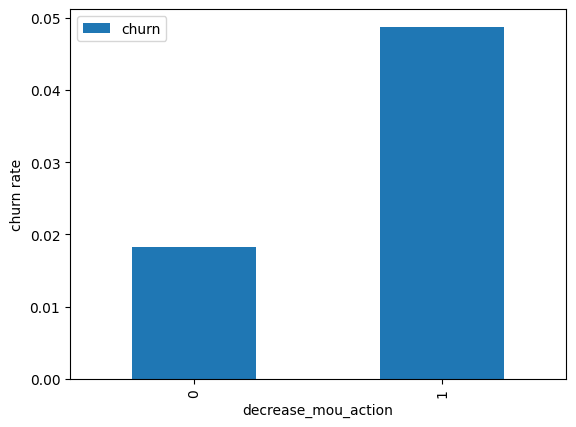

In [73]:
# Churn rate on the basis whether the customer decreased her/his MOU
tccs_df_data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

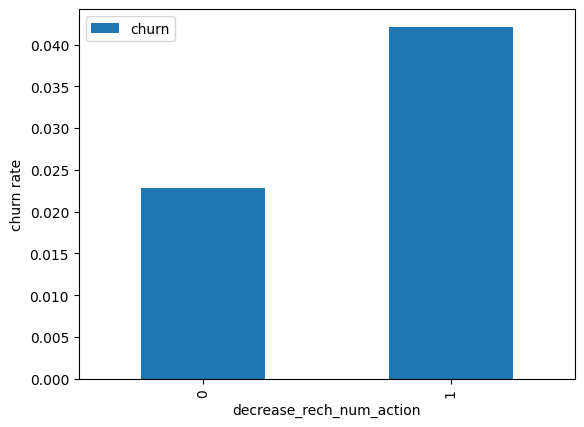

In [74]:
# Churn rate on the basis whether the customer decreased her/his number of recharge
tccs_df_data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

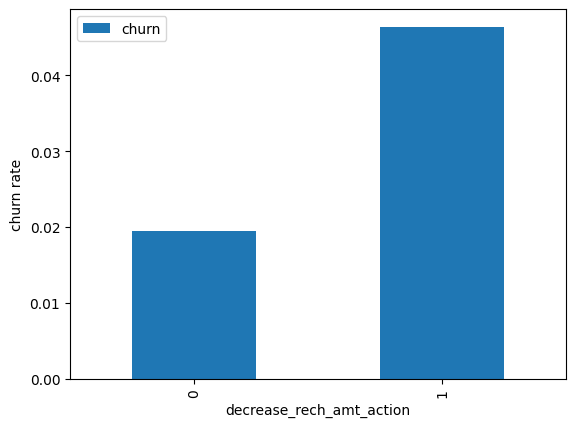

In [75]:
# Churn rate on the basis whether the customer decreased her/his amount of recharge
tccs_df_data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

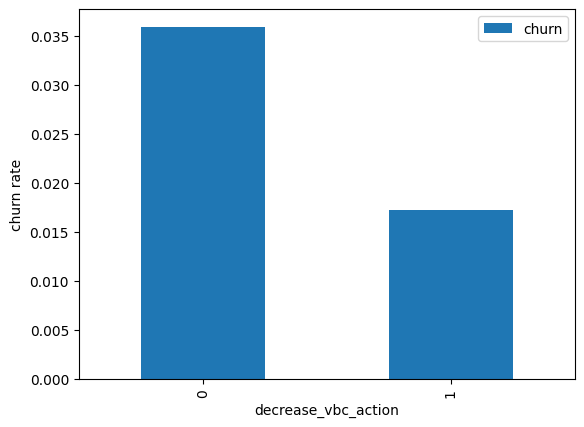

In [76]:
# Churn rate on the basis whether the customer decreased her/his volume based cost
tccs_df_data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [77]:
# Creating churn dataframe
data_churn = tccs_df_data[tccs_df_data['churn'] == 1]

# Creating not churn dataframe
data_non_churn = tccs_df_data[tccs_df_data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

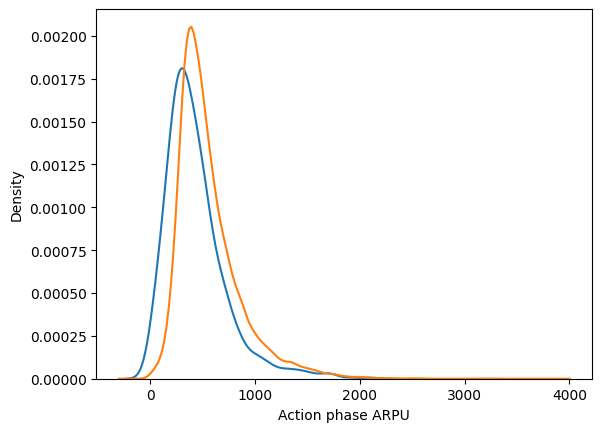

In [78]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

[Text(0.5, 0, 'Action phase MOU')]

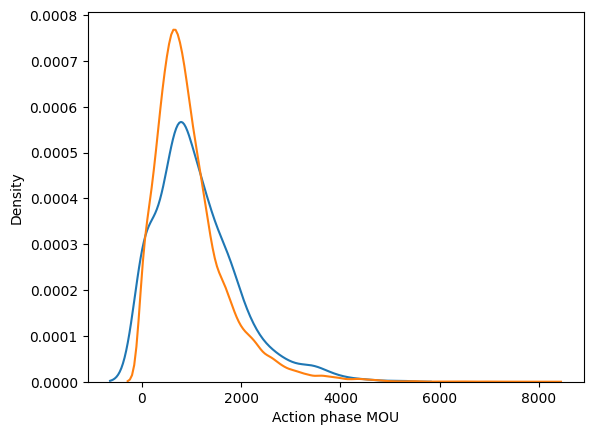

In [79]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

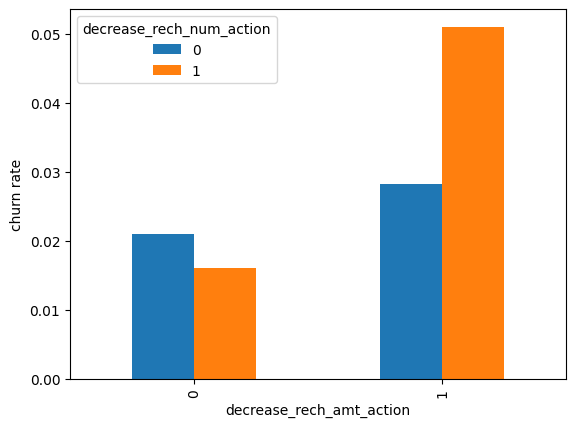

In [80]:
# Bar Graph for decrease_rech_amt_action
tccs_df_data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

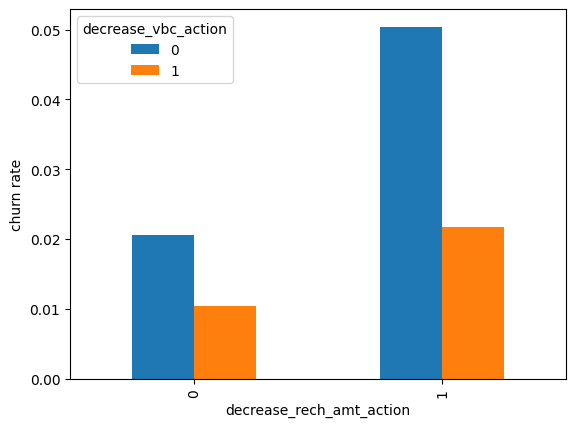

In [81]:
# Bar Graph for decrease_rech_amt_action
tccs_df_data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

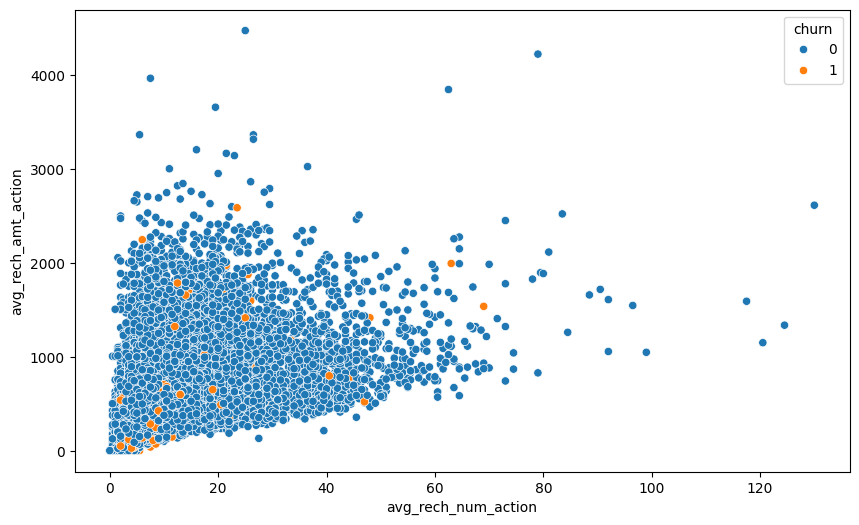

In [82]:
# Scatter Plot between avg_rech_num_action and avg_rech_amt_action
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='avg_rech_num_action',y='avg_rech_amt_action', hue='churn', data=tccs_df_data)

In [83]:
# Dropping few derived columns, which are not required in further analysis
tccs_df_data = tccs_df_data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

### Train - Test Split

In [84]:
# Putting feature variables into X
X = tccs_df_data.drop(['mobile_number','churn'], axis=1)

In [85]:
# Putting target variable to y
y = tccs_df_data['churn']

In [86]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with Imbalanced Data

In [87]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [88]:
# Instantiate the Scaler
scaler = StandardScaler()

In [89]:
# List of the numeric columns
tccs_cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
tccs_cols_scale.remove('decrease_mou_action')
tccs_cols_scale.remove('decrease_rech_num_action')
tccs_cols_scale.remove('decrease_rech_amt_action')
tccs_cols_scale.remove('decrease_arpu_action')
tccs_cols_scale.remove('decrease_vbc_action')

In [90]:
# Fit the data into scaler and transform
X_train[tccs_cols_scale] = scaler.fit_transform(X_train[tccs_cols_scale])

In [91]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,...,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,...,-0.113882,-0.790173,-0.255884,-0.265392,-0.259366,0,0,0,0,0
2,0.0,0.0,0.0,-0.222751,0.543206,0.809117,-0.601239,-0.599206,-0.331043,-0.363395,...,2.526725,1.571302,3.307334,2.691063,1.700218,1,0,0,0,0
3,0.0,0.0,0.0,-0.911173,0.842273,0.731302,-0.702232,-0.650471,-0.458464,-0.789784,...,-0.113882,-0.951024,-0.255884,-0.265392,-0.259366,0,0,0,0,0
4,0.0,0.0,0.0,0.271356,0.247684,1.256421,-0.356392,-0.180394,0.114727,0.899204,...,-0.113882,-0.519757,-0.255884,-0.265392,-0.259366,0,0,0,0,0


We don't fit scaler on the test set. We only transform the test set.

In [92]:
# Transform the test set
X_test[tccs_cols_scale] = scaler.transform(X_test[tccs_cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,...,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,...,-0.113882,0.622516,2.423668,2.357564,5.861151,1,1,1,1,1
39613,0.0,0.0,0.0,0.545470,0.184388,1.403349,-0.537110,-0.521615,-0.206890,0.694901,...,-0.113882,2.966507,-0.255884,-0.265392,-0.259366,1,1,1,0,0
93118,0.0,0.0,0.0,0.641508,0.816632,-0.211023,-0.058843,0.029897,-0.155872,-0.148197,...,-0.113882,1.742643,-0.255884,-0.265392,-0.259366,1,0,1,1,0
81235,0.0,0.0,0.0,3.878627,0.911619,2.745295,4.117829,1.452446,2.809582,-0.002634,...,1.206422,-0.244679,-0.255884,-0.265392,-0.259366,1,1,1,1,0


### Model with PCA

In [93]:
# Instantiate PCA
pca = PCA(random_state=42)

In [94]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [95]:
# Principal components
pca.components_

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -2.59799614e-02, -2.57740516e-02,  1.40032998e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16737642e-02, -9.94022864e-03, -1.42598315e-02],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -4.18532955e-02, -4.28357226e-02,  2.46812846e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.12364694e-13,  8.09184061e-13, -2.21673685e-12],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -5.45926755e-12, -6.72599648e-12,  1.38860421e-11],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -9.57801686e-12, -9.81262810e-12,  2.13400086e-11]])

In [96]:
# Cumuliative varinace of the PCs
variance_cumul = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumul)

[0.11213256 0.19426234 0.24575583 0.28953571 0.32841891 0.36623473
 0.40173361 0.43144425 0.45702167 0.48194328 0.50480575 0.52673812
 0.54724457 0.5670202  0.58530008 0.60304258 0.6190213  0.63473458
 0.64927873 0.66341423 0.67712828 0.69025011 0.7020618  0.71278516
 0.72309435 0.73290234 0.74255604 0.75209676 0.76151565 0.77010093
 0.77861315 0.7866115  0.79429496 0.80173555 0.80878909 0.81538157
 0.82193734 0.8283476  0.83472622 0.84089758 0.84687761 0.85280024
 0.85840083 0.86374029 0.86901646 0.87418749 0.87891437 0.88341796
 0.887723   0.89186057 0.89588256 0.89966074 0.90339384 0.90704071
 0.91060084 0.91411689 0.91752343 0.92076319 0.92395413 0.92705111
 0.93001239 0.93296077 0.93580029 0.93862291 0.94138851 0.9441162
 0.94678675 0.94937767 0.95188405 0.95433786 0.95665036 0.95893735
 0.96116409 0.96323063 0.96526039 0.967203   0.96912626 0.97100138
 0.97284931 0.9746657  0.97639261 0.97806622 0.97972617 0.98133794
 0.98290963 0.98446566 0.98601222 0.98753485 0.98877905 0.98998

Text(0, 0.5, 'Cumulative Variance')

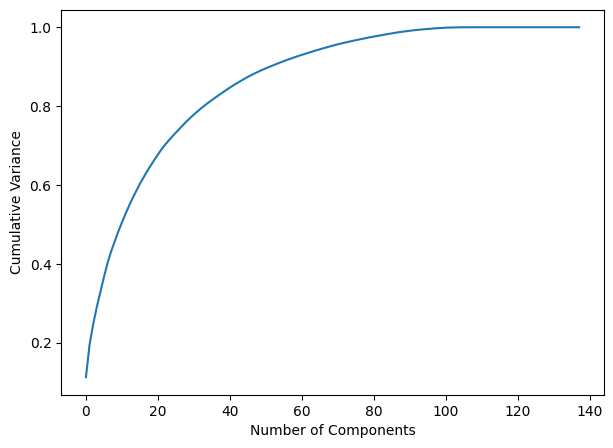

In [97]:
# Plotting scree plot
fig = plt.figure(figsize = (7,5))
plt.plot(variance_cumul)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [98]:
# PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [99]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Transformation with the already fitted data on the train set.

In [100]:
X_test_pca = pca_final.transform(X_test)

## Logistic regression with PCA

In [101]:
# Creating KFold object with 5 splits
foldk = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = foldk, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [102]:
# results of grid search CV
gridcv_results = pd.DataFrame(model_cv.cv_results_)
gridcv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.102486,0.006874,0.004762,0.000869,0.01,{'C': 0.01},0.900071,0.897759,0.895581,0.906192,...,0.897431,0.006080,5,0.901174,0.898197,0.899387,0.895382,0.897913,0.898411,0.001900
1,0.169556,0.010787,0.004772,0.000627,0.10,{'C': 0.1},0.898413,0.896592,0.894884,0.906425,...,0.897143,0.005533,6,0.901232,0.898256,0.899270,0.896783,0.899374,0.898983,0.001460
2,0.202795,0.012567,0.004621,0.000618,1.00,{'C': 1},0.898177,0.898693,0.895814,0.904795,...,0.897515,0.004749,4,0.901814,0.898256,0.898861,0.898301,0.899199,0.899286,0.001312
3,0.214620,0.029449,0.003852,0.000819,10.00,{'C': 10},0.899124,0.898226,0.896744,0.904330,...,0.897704,0.004582,2,0.902511,0.898839,0.898628,0.898651,0.899550,0.899636,0.001476
4,0.195248,0.007940,0.002395,0.001579,100.00,{'C': 100},0.899361,0.897993,0.896744,0.903864,...,0.897612,0.004461,3,0.902511,0.898664,0.898628,0.898710,0.899199,0.899542,0.001499
5,0.210217,0.019364,0.004496,0.001439,1000.00,{'C': 1000},0.899361,0.897993,0.896977,0.904330,...,0.897751,0.004585,1,0.902569,0.898489,0.898569,0.898651,0.899257,0.899507,0.001555


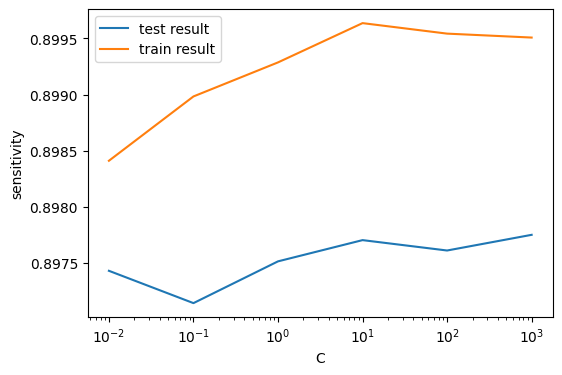

In [103]:
# plot of C versus train and validation scores

plt.figure(figsize=(6, 4))
plt.plot(gridcv_results['param_C'], gridcv_results['mean_test_score'])
plt.plot(gridcv_results['param_C'], gridcv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [104]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8977513409589412 at C = 1000


#### Logistic regression with optimal C

In [105]:
logisticreg_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
logreg_pca_model = logisticreg_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [106]:
# Predictions on the train set
y_train_pred = logreg_pca_model.predict(X_train_pca)

In [107]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17909  3516]
 [ 2158 19267]]


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8675845974329055
Sensitivity:- 0.8992765460910151
Specificity:- 0.8358926487747959


##### Prediction on the test set

In [110]:
# Prediction on the test set
y_test_pred = logreg_pca_model.predict(X_test_pca)

In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4450  898]
 [  36  157]]


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8314383685255369
Sensitivity:- 0.8134715025906736
Specificity:- 0.8320867614061331


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83

## Support Vector Machine(SVM) with PCA

#### Hyperparameter tuning

gamma:- Handles non linear classifications.

In [114]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf", max_iter=1000)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_pca, y_train)            


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(max_iter=1000),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [115]:
# cv results
gcv_results = pd.DataFrame(model_cv.cv_results_)
gcv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.715645,0.072436,2.311839,0.035527,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.695463,0.710145,0.746972,0.717527,0.021666,4,0.701148,0.701999,0.746736,0.716628,0.021293
1,2.601168,0.058008,2.281762,0.031610,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.535004,0.540503,0.532031,0.535846,0.003509,11,0.535812,0.535653,0.535373,0.535613,0.000181
2,2.741435,0.275075,2.277462,0.005338,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.564128,0.567528,0.562767,0.564807,0.002002,8,0.564132,0.565618,0.565618,0.565123,0.000700
3,2.491904,0.176735,2.165302,0.020896,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.811677,0.870265,0.824897,0.835613,0.025090,1,0.819611,0.870830,0.819057,0.836499,0.024277
4,2.724681,0.067580,2.325080,0.041048,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.563428,0.550585,0.554435,0.556149,0.005381,9,0.567213,0.546225,0.556306,0.556581,0.008571
5,2.698101,0.070285,2.323486,0.011590,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.502660,0.521249,0.504166,0.509358,0.008430,12,0.502801,0.519796,0.503273,0.508623,0.007903
6,2.194704,0.196542,1.859964,0.035941,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.751330,0.850032,0.732899,0.778087,0.051426,2,0.766611,0.845696,0.732279,0.781528,0.047489
7,2.244961,0.058379,1.998724,0.022379,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.699664,0.681159,0.664916,0.681913,0.014196,6,0.710845,0.678055,0.665243,0.684714,0.019203
8,2.453200,0.012455,2.226219,0.012497,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.585410,0.544353,0.534201,0.554655,0.022139,10,0.589932,0.539294,0.535758,0.554995,0.024747
9,1.958502,0.020423,1.756772,0.010015,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.792985,0.700623,0.770776,0.754795,0.039364,3,0.809739,0.695908,0.770154,0.758600,0.047184


##### Plotting the accuracy with various C and gamma values

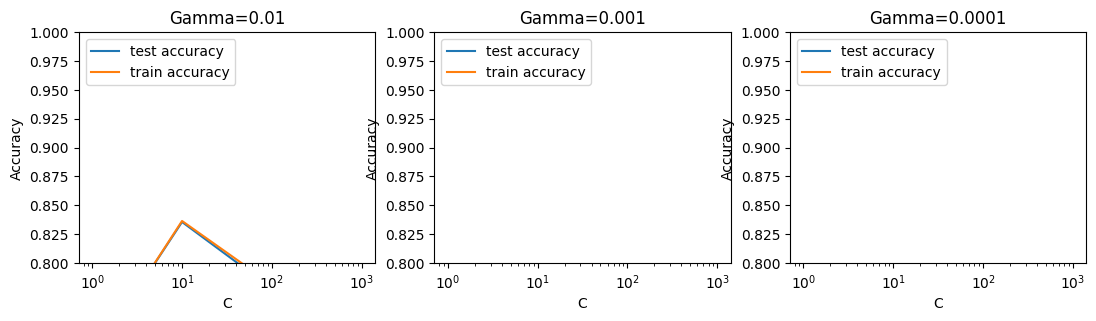

In [116]:
# converting C to numeric type for plotting
gcv_results['param_C'] = gcv_results['param_C'].astype('int')

# plotting
plt.figure(figsize=(13,3))

# subplot
plt.subplot(131)
gamma_01 = gcv_results[gcv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot
plt.subplot(132)
gamma_001 = gcv_results[gcv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot
plt.subplot(133)
gamma_0001 = gcv_results[gcv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [117]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.835613160694502 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [118]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [119]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [120]:
# Confusion matrix
con_mat = metrics.confusion_matrix(y_train, y_train_pred)
print(con_mat)

[[18376  3049]
 [ 1585 19840]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.891855309218203
Sensitivity:- 0.8134715025906736
Specificity:- 0.8320867614061331


##### Prediction on the test set

In [123]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4557  791]
 [  36  157]]


In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8507489622811767
Sensitivity:- 0.8134715025906736
Specificity:- 0.8520942408376964


***Model summary***

- Train set
    - Accuracy = 0.89
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.81
    - Specificity = 0.85

## Decision tree with PCA

##### Hyperparameter tuning

In [128]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [129]:
# cv results
grid_cv_results = pd.DataFrame(grid_search.cv_results_)
grid_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.517696,0.032550,0.005359,0.002142,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
1,1.346896,0.012000,0.004402,0.006595,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
2,1.337728,0.009720,0.004216,0.001460,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849475,0.861564,0.009567,7
3,1.330370,0.005667,0.005304,0.000393,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849008,0.861470,0.009686,8
4,2.334545,0.042618,0.003900,0.001959,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
5,2.454937,0.129976,0.007509,0.003533,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
6,2.510155,0.154535,0.006830,0.004781,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.869778,0.875613,0.891949,0.884247,0.882240,0.008389,3
7,2.314775,0.067639,0.003309,0.002720,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.869778,0.875613,0.891949,0.884247,0.882240,0.008389,3


In [130]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9004900816802801
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [131]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [132]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18913  2512]
 [ 1763 19662]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9002333722287048
Sensitivity:- 0.9177129521586931
Specificity:- 0.8827537922987164


##### Prediction on the test set

In [136]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4632  716]
 [  58  135]]


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8603140227395777
Sensitivity:- 0.6994818652849741
Specificity:- 0.8661181750186986


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.69
    - Specificity = 0.86
    
    
We can see from the model performance that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Random forest with PCA

##### Hyperparameter tuning

In [141]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [142]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8446907712801472 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [143]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=25,
                             n_estimators=300)

In [144]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=25, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [145]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17576  3849]
 [ 2455 18970]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.852882147024504
Sensitivity:- 0.885414235705951
Specificity:- 0.8203500583430572


##### Prediction on the test set

In [149]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [150]:
# Confusion matrix
mat_confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(mat_confusion)

[[4340 1008]
 [  47  146]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8096011550261686
Sensitivity:- 0.885414235705951
Specificity:- 0.8203500583430572


***Model summary***

- Train set
    - Accuracy = 0.85
    - Sensitivity = 0.88
    - Specificity = 0.82
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.88
    - Specificity = 0.82

### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

# Without PCA

## Logistic regression with No PCA

In [153]:
##### Importing stats model
import statsmodels.api as sm

In [154]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [155]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [156]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 05 Oct 2024   Deviance:                       23572.
Time:                        19:49:40   Pearson chi2:                 3.70e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -57.1044   4421.656     -0.013      0.990   -8723.392    8609.183
loc_og_t2o_mou            8.215e-09   1.53e-08      0.535      0.592   -2.19e-08    3.83e-08
std_og_t2o_mou           -1.194e-07   7.04e-08     -1.697      0.090   -2.57e-07    1.85e-08
loc_ic_t2o_mou            1.051e-08   4.35e-08      0.242      0.809   -7.47e-08    9.57e-08
arpu_6                      -0.0338      0.081     -0.419      0.675      -0.192       0.124
arpu_7                       0.0854      0.086      0.996      0.319      -0.083       0.254
arpu_8                       0.0909      0.110      0.829      0.407      -0.124       0.306
onnet_mou_6                 15.5137      3.576      4.338      0.000       8.505      22.523
onnet_mou_7                 -4.3247      1.809     -2.390      0.017      -7.871      -0.778
onnet_mou_8                  2.3519      1.828      1.287      0.198      -1.231       5.935
offnet_mou_6                15.0880      3.364      4.485      0.000       8.495      21.681
offnet_mou_7                -1.7626      1.714     -1.028      0.304      -5.122       1.597
offnet_mou_8                -0.5504      1.886     -0.292      0.770      -4.247       3.146
roam_ic_mou_6                0.1622      0.036      4.479      0.000       0.091       0.233
roam_ic_mou_7               -0.0099      0.052     -0.189      0.850      -0.112       0.092
roam_ic_mou_8                0.2041      0.044      4.663      0.000       0.118       0.290
roam_og_mou_6               -5.1507      1.132     -4.550      0.000      -7.369      -2.932
roam_og_mou_7                0.8854      0.472      1.875      0.061      -0.040       1.811
roam_og_mou_8                0.0930      0.532      0.175      0.861      -0.949       1.135
loc_og_t2t_mou_6         -3302.9964    656.207     -5.033      0.000   -4589.138   -2016.854
loc_og_t2t_mou_7         -1474.5817    679.592     -2.170      0.030   -2806.558    -142.605
loc_og_t2t_mou_8          5516.0262    628.044      8.783      0.000    4285.082    6746.971
loc_og_t2m_mou_6         -3342.6197    663.959     -5.034      0.000   -4643.956   -2041.284
loc_og_t2m_mou_7         -1392.0742    640.924     -2.172      0.030   -2648.263    -135.886
loc_og_t2m_mou_8          5887.2772    670.147      8.785      0.000    4573.813    7200.741
loc_og_t2f_mou_6          -285.2396     56.695     -5.031      0.000    -396.360    -174.120
loc_og_t2f_mou_7          -123.0135     56.661     -2.171      0.030    -234.066     -11.961
loc_og_t2f_mou_8           487.3904     55.508      8.780      0.000     378.596     596.185
loc_og_t2c_mou_6             0.0433      0.022      1.980      0.048       0.000       0.086
loc_og_t2c_mou_7             0.0099      0.021      0.462      0.644      -0.032       0.052
loc_og_t2c_mou

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

### Feature Selection Using RFE

In [157]:
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [158]:
# Intantiate RFE with 15 columns
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [159]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


### Model-1 with RFE selected columns

In [160]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 05 Oct 2024   Deviance:                       30008.
Time:                        19:50:52   Pearson chi2:                 4.49e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -53.0128   4235.111     -0.013      0.990   -8353.678    8247.653
offnet_mou_7            0.6096      0.026     23.449      0.000       0.559       0.661
offnet_mou_8           -3.2532      0.106    -30.548      0.000      -3.462      -3.045
roam_og_mou_8           1.2482      0.032     39.496      0.000       1.186       1.310
std_og_t2m_mou_8        2.4408      0.094     26.101      0.000       2.258       2.624
isd_og_mou_8           -1.0212      0.194     -5.271      0.000      -1.401      -0.641
og_others_7            -1.1915      0.862     -1.382      0.167      -2.881       0.498
og_others_8         -3780.7240   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
loc_ic_t2f_mou_8       -0.7547      0.072    -10.487      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9744      0.066    -30.078      0.000      -2.103      -1.846
std_ic_t2f_mou_8       -0.7922      0.075    -10.607      0.000      -0.939      -0.646
ic_others_8            -1.4913      0.132    -11.305      0.000      -1.750      -1.233
total_rech_num_8       -0.4840      0.018    -26.977      0.000      -0.519      -0.449
monthly_2g_8           -0.9031      0.043    -20.851      0.000      -0.988      -0.818
monthly_3g_8           -0.9871      0.043    -22.711      0.000      -1.072      -0.902
decrease_vbc_action    -1.3078      0.073    -17.956      0.000      -1.451      -1.165
=======================================================================================
"""

#### Checking VIFs

In [161]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
8,loc_ic_mou_8,1.68
7,loc_ic_t2f_mou_8,1.21
11,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
14,decrease_vbc_action,1.08
13,monthly_3g_8,1.06
6,og_others_8,1.05


##### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [163]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


### Model-2
Building the model after removing og_others_8 variable.

In [164]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15034.
Date:                Sat, 05 Oct 2024   Deviance:                       30068.
Time:                        19:50:53   Pearson chi2:                 4.51e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4957
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1052      0.031    -35.342      0.000      -1.167      -1.044
offnet_mou_7            0.6081      0.026     23.427      0.000       0.557       0.659
offnet_mou_8           -3.2557      0.106    -30.603      0.000      -3.464      -3.047
roam_og_mou_8           1.2491      0.031     39.747      0.000       1.188       1.311
std_og_t2m_mou_8        2.4428      0.093     26.146      0.000       2.260       2.626
isd_og_mou_8           -1.0982      0.196     -5.590      0.000      -1.483      -0.713
og_others_7            -1.8793      0.818     -2.299      0.022      -3.482      -0.277
loc_ic_t2f_mou_8       -0.7548      0.072    -10.491      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9714      0.066    -30.058      0.000      -2.100      -1.843
std_ic_t2f_mou_8       -0.8020      0.075    -10.727      0.000      -0.949      -0.655
ic_others_8            -1.4871      0.132    -11.278      0.000      -1.746      -1.229
total_rech_num_8       -0.4864      0.018    -27.146      0.000      -0.522      -0.451
monthly_2g_8           -0.9066      0.043    -20.866      0.000      -0.992      -0.821
monthly_3g_8           -0.9862      0.043    -22.700      0.000      -1.071      -0.901
decrease_vbc_action    -1.3097      0.073    -17.994      0.000      -1.452      -1.167
=======================================================================================
"""

#### Checking VIF for Model-2

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
7,loc_ic_mou_8,1.68
6,loc_ic_t2f_mou_8,1.21
10,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
13,decrease_vbc_action,1.08
12,monthly_3g_8,1.06
11,monthly_2g_8,1.05


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [166]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3
Model after removing offnet_mou_8 column.

In [167]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15720.
Date:                Sat, 05 Oct 2024   Deviance:                       31440.
Time:                        19:50:54   Pearson chi2:                 3.92e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4793
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2058      0.032    -37.536      0.000      -1.269      -1.143
offnet_mou_7            0.3665      0.022     16.456      0.000       0.323       0.410
roam_og_mou_8           0.7135      0.024     29.260      0.000       0.666       0.761
std_og_t2m_mou_8       -0.2474      0.022    -11.238      0.000      -0.291      -0.204
isd_og_mou_8           -1.3811      0.212     -6.511      0.000      -1.797      -0.965
og_others_7            -2.4711      0.872     -2.834      0.005      -4.180      -0.762
loc_ic_t2f_mou_8       -0.7102      0.075     -9.532      0.000      -0.856      -0.564
loc_ic_mou_8           -3.3287      0.057    -58.130      0.000      -3.441      -3.216
std_ic_t2f_mou_8       -0.9503      0.078    -12.181      0.000      -1.103      -0.797
ic_others_8            -1.5131      0.129    -11.771      0.000      -1.765      -1.261
total_rech_num_8       -0.5060      0.018    -28.808      0.000      -0.540      -0.472
monthly_2g_8           -0.9279      0.044    -21.027      0.000      -1.014      -0.841
monthly_3g_8           -1.0943      0.046    -23.615      0.000      -1.185      -1.004
decrease_vbc_action    -1.3293      0.072    -18.478      0.000      -1.470      -1.188
=======================================================================================
"""

#### VIF Model-3

In [168]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2m_mou_8,1.87
0,offnet_mou_7,1.72
6,loc_ic_mou_8,1.33
5,loc_ic_t2f_mou_8,1.21
9,total_rech_num_8,1.17
12,decrease_vbc_action,1.07
1,roam_og_mou_8,1.06
11,monthly_3g_8,1.06
10,monthly_2g_8,1.05
7,std_ic_t2f_mou_8,1.02


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-3 log_no_pca_3 will be the final model.

###  Model performance on the train set

In [169]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    2.687411e-01
1    7.047483e-02
2    8.024370e-02
3    3.439222e-03
4    5.253815e-19
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [170]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.687411e-01,0
1,0,7.047483e-02,1
2,0,8.024370e-02,2
3,0,3.439222e-03,3
4,0,5.253815e-19,4


In [171]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0


In [172]:
# Creating a dataframe to calculate the accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.753629     0.984411     0.522847
0.2          0.2  0.788751     0.964714     0.612789
0.3          0.3  0.812509     0.946371     0.678646
0.4          0.4  0.829638     0.923874     0.735403
0.5          0.5  0.844131     0.895823     0.792439
0.6          0.6  0.844271     0.839860     0.848681
0.7          0.7  0.836173     0.769522     0.902824
0.8          0.8  0.800163     0.652275     0.948051
0.9          0.9  0.595426     0.207001     0.983851


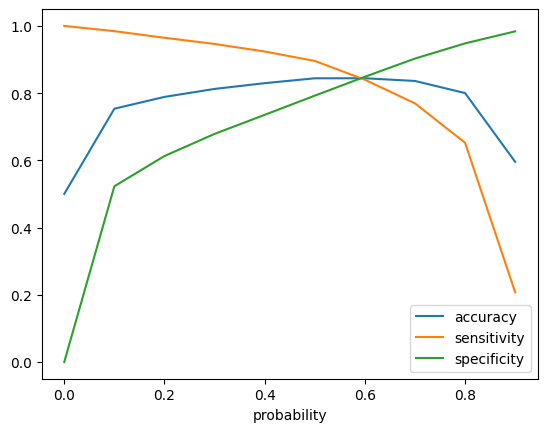

In [173]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [174]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0,0


In [175]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16978  4447]
 [ 2232 19193]]


In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8441306884480747
Sensitivity:- 0.8958226371061844
Specificity:- 0.792438739789965


We have got good accuracy, sensitivity and specificity on the train set prediction.

In [178]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

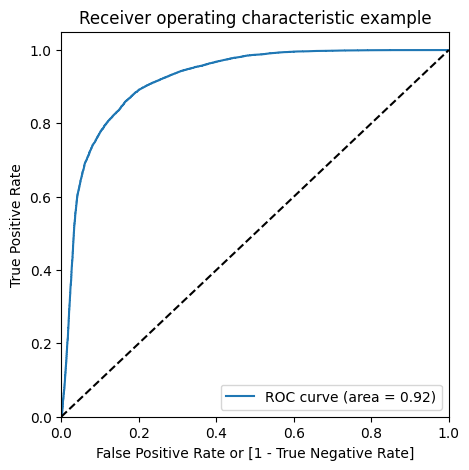

In [179]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, which is the Gini of the model.

### Testing the model on the test set

In [180]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [181]:
X_test_log = X_test_log[log_cols]

In [182]:
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [183]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [184]:
y_test_pred.head()

5704     0.034015
64892    0.000578
39613    0.513564
93118    0.020480
81235    0.034115
dtype: float64

In [185]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.034015
64892,0.000578
39613,0.513564
93118,0.020480
81235,0.034115


In [186]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [187]:
y_test_df['CustID'] = y_test_df.index

In [188]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [189]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [190]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.034015
1,0,64892,0.000578
2,0,39613,0.513564
3,0,93118,0.020480
4,0,81235,0.034115


In [191]:
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [192]:
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [193]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.034015
1,64892,0,0.000578
2,39613,0,0.513564
3,93118,0,0.020480
4,81235,0,0.034115


In [194]:
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [195]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.034015,0
1,64892,0,0.000578,0
2,39613,0,0.513564,1
3,93118,0,0.020480,0
4,81235,0,0.034115,0


In [196]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4190 1158]
 [  34  159]]


In [197]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [198]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.7848763761053962
Sensitivity:- 0.8238341968911918
Specificity:- 0.7834704562453254


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.89
    - Specificity = 0.79
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Plots of important predictors for churn and non churn customers

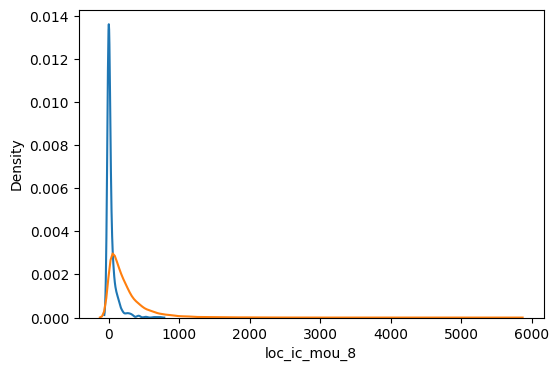

In [202]:
fig = plt.figure(figsize=(6,4))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

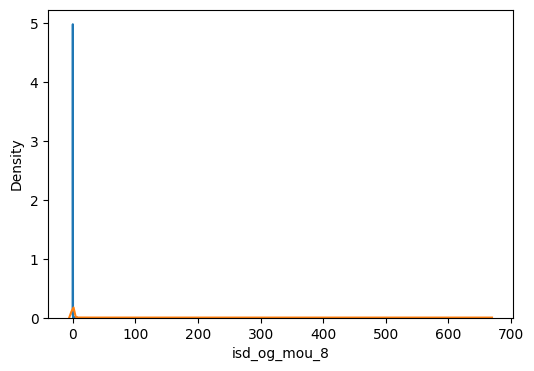

In [203]:
fig = plt.figure(figsize=(6,4))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

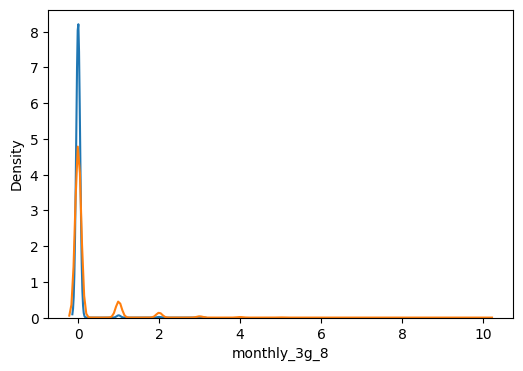

In [204]:
fig = plt.figure(figsize=(6,4))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()